In [33]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Загружаем данные из файла
file_path = 'Whoosh_Trips_case_2.csv'
data = pd.read_csv(file_path, sep=';')
data.head()

,user_id,started_at,finished_at,cost,paid_up,has_penalty,platform
0,71506,2020-05-19 13:53:25.286+00,2020-05-19 14:13:25.62+00,19500,True,NaN,ANDROID
1,71506,2020-06-20 12:23:18.699+00,2020-06-20 12:50:35.368+00,24400,True,NaN,ANDROID
2,115258,2020-05-09 07:37:30.688+00,2020-05-09 08:36:48.3+00,43300,True,NaN,IOS
3,115258,2020-05-09 07:37:30.688+00,2020-05-09 08:36:48.3+00,43300,True,NaN,ANDROID
4,74999,2020-06-01 14:43:18.526+00,2020-06-01 15:08:46.742+00,18000,True,NaN,IOS


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63459 entries, 0 to 63458
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      63459 non-null  int64 
 1   started_at   63459 non-null  object
 2   finished_at  63459 non-null  object
 3   cost         63459 non-null  int64 
 4   paid_up      63459 non-null  bool  
 5   has_penalty  34 non-null     object
 6   platform     63459 non-null  object
dtypes: bool(1), int64(2), object(4)
memory usage: 3.0+ MB


In [36]:

# Конвертируем 'started_at' и 'finished_at' в datetime
data['started_at'] = pd.to_datetime(data['started_at'], format='ISO8601', errors='coerce')
data['finished_at'] = pd.to_datetime(data['finished_at'], format='ISO8601', errors='coerce')

In [37]:
# Проверка на наличие дубликатов
duplicate_rows = data[data.duplicated()]

# Проверка на наличие пропущенных значений
missing_values = data.isnull().sum()

missing_values

user_id            0
started_at         0
finished_at        0
cost               0
paid_up            0
has_penalty    63425
platform           0
dtype: int64

In [38]:
duplicate_rows

,user_id,started_at,finished_at,cost,paid_up,has_penalty,platform


In [39]:
# Замена пропущенных значений в 'has_penalty' на False
data['has_penalty'] = data['has_penalty'].fillna(False)


In [40]:
# Добавляем столбцы для даты и времени для удобства расчетов
data['date'] = data['started_at'].dt.date
data['hour'] = data['started_at'].dt.hour
data['day_of_week'] = data['started_at'].dt.day_name()
data['week'] = data['started_at'].dt.isocalendar().week
data['month'] = data['started_at'].dt.month

In [41]:
# Расчет общего количества поездок и среднего количества поездок по часам, дням, неделям и месяцам
total_trips = data.shape[0]
avg_trips_per_hour = data.groupby('hour').size().mean()
avg_trips_per_day = data.groupby('date').size().mean()
avg_trips_per_week = data.groupby('week').size().mean()
avg_trips_per_month = data.groupby('month').size().mean()

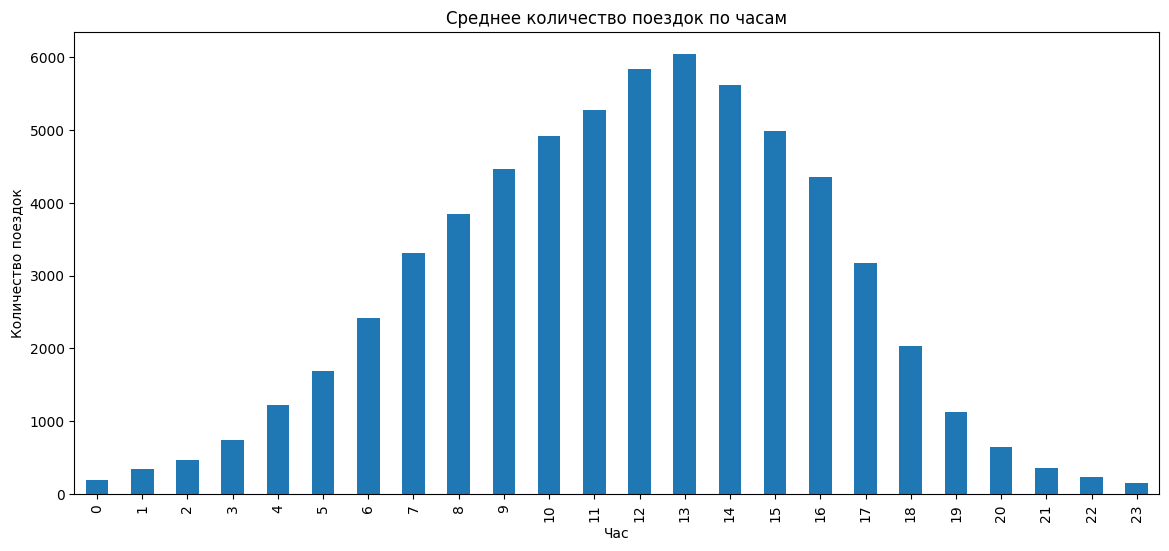

In [42]:
# Визуализация среднего количества поездок по часам
plt.figure(figsize=(14, 6))
data.groupby('hour').size().plot(kind='bar')
plt.title('Среднее количество поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.show()

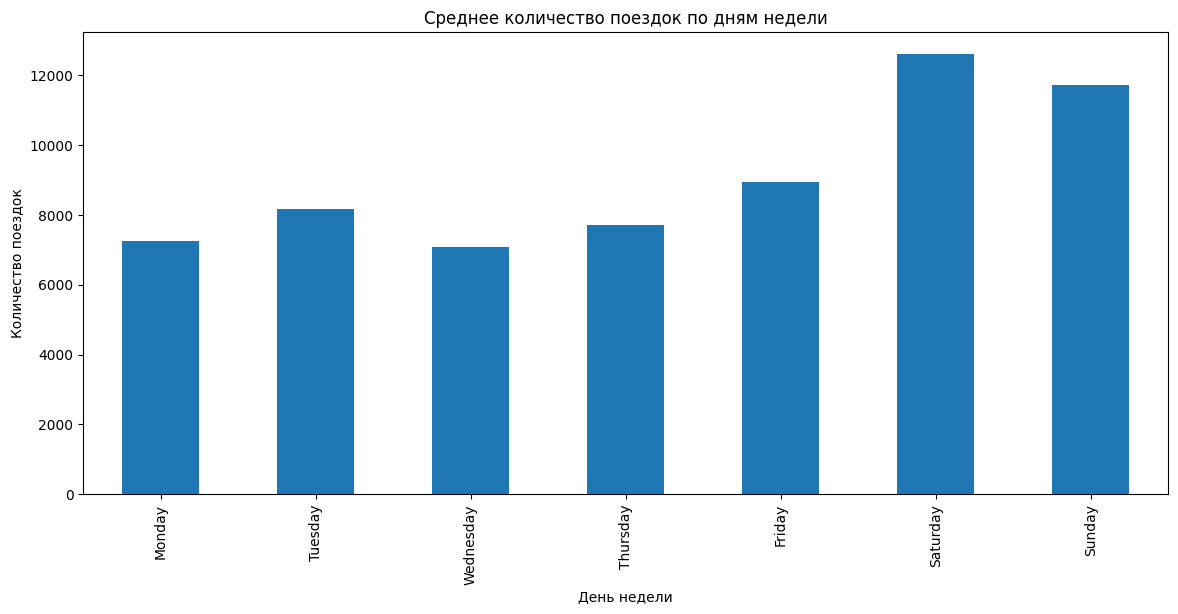

In [43]:
# Визуализация среднего количества поездок по дням недели
plt.figure(figsize=(14, 6))
data.groupby('day_of_week').size().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind='bar')
plt.title('Среднее количество поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.show()

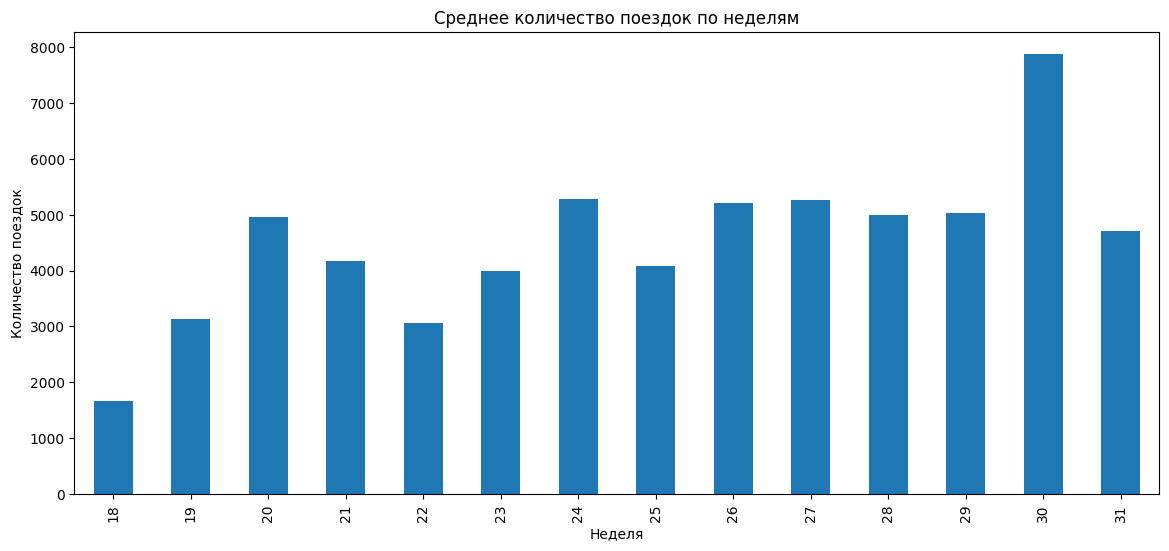

In [44]:
# Визуализация среднего количества поездок по неделям
plt.figure(figsize=(14, 6))
data.groupby('week').size().plot(kind='bar')
plt.title('Среднее количество поездок по неделям')
plt.xlabel('Неделя')
plt.ylabel('Количество поездок')
plt.show()

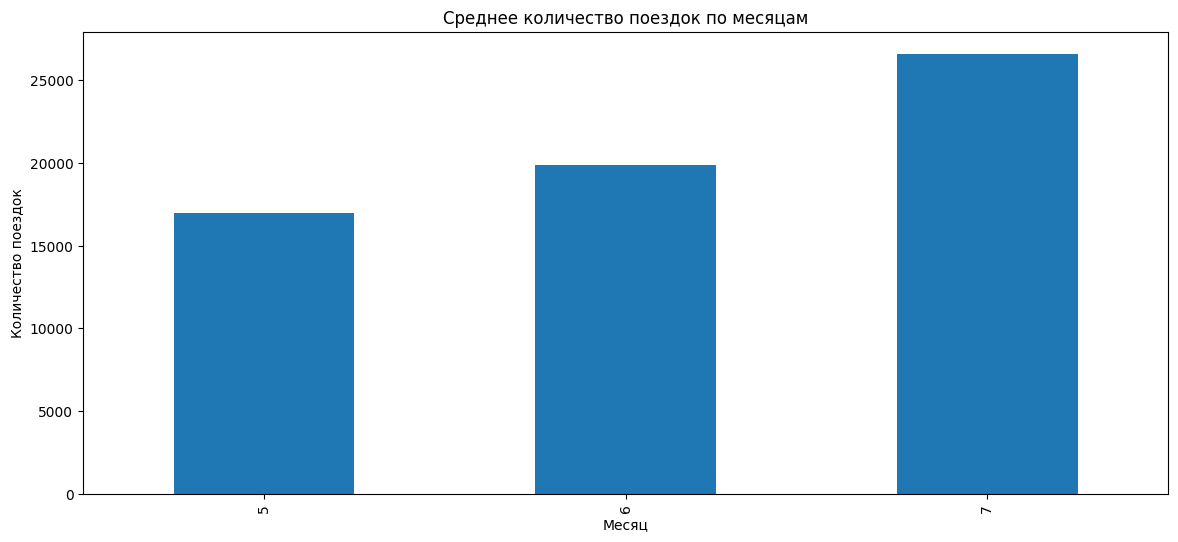

In [45]:
# Визуализация среднего количества поездок по месяцам
plt.figure(figsize=(14, 6))
data.groupby('month').size().plot(kind='bar')
plt.title('Среднее количество поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.show()

На графиках выше представлены следующие визуализации:

Среднее количество поездок по часам: Показывает распределение активности пользователей по часам в течение суток.

Среднее количество поездок по дням недели: Отображает, в какие дни недели сервис пользуется большей популярностью.

Среднее количество поездок по неделям: Помогает увидеть недельные тренды и изменения в использовании сервиса.

Среднее количество поездок по месяцам: Иллюстрирует месячные тренды в использовании сервиса.


In [47]:
# Расчет продолжительности каждой поездки в минутах
data['trip_duration'] = (data['finished_at'] - data['started_at']).dt.total_seconds() / 60

# Средняя продолжительность поездки
average_trip_duration = data['trip_duration'].mean()

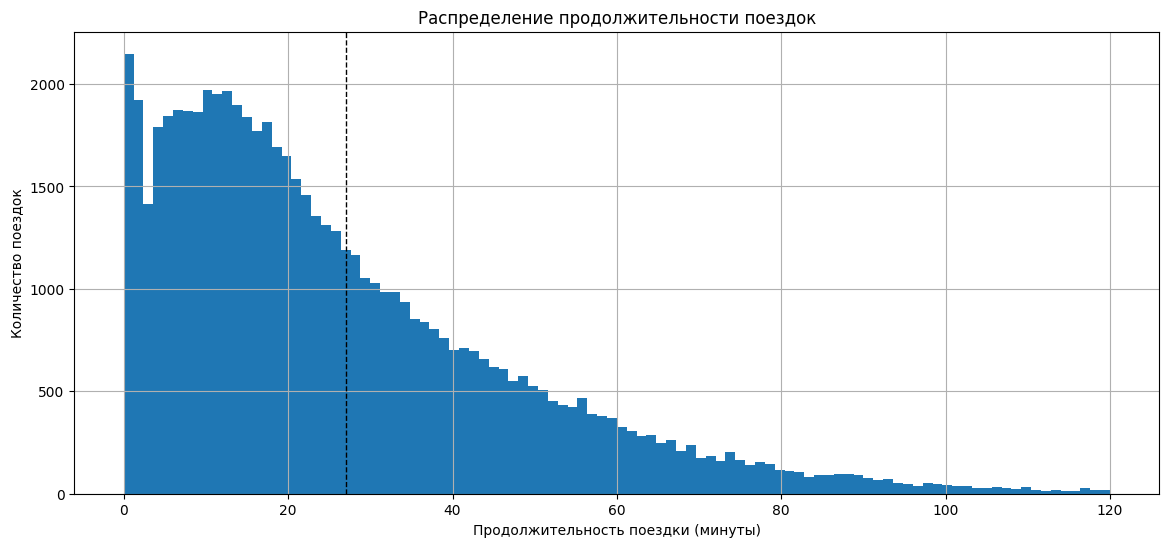

In [48]:
# Визуализация распределения продолжительности поездок
plt.figure(figsize=(14, 6))
data['trip_duration'].hist(bins=100, range=(0, 120))  # Ограничим диапазон для лучшей визуализации
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность поездки (минуты)')
plt.ylabel('Количество поездок')
plt.axvline(average_trip_duration, color='k', linestyle='dashed', linewidth=1)
plt.show()

Средняя продолжительность поездки составляет приблизительно 27 минут. На гистограмме выше показано распределение продолжительности поездок в минутах, где черная пунктирная линия указывает на среднее значение.

In [49]:
# Расчет частоты штрафов
penalty_rate = data['has_penalty'].sum() / total_trips

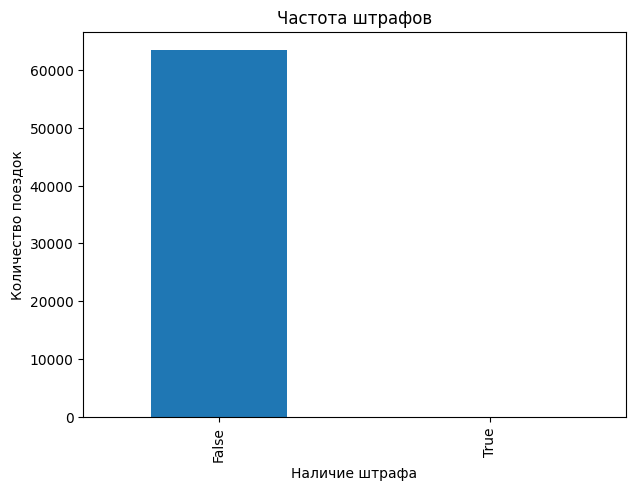

In [50]:
# Визуализация частоты штрафов
fig, ax = plt.subplots(figsize=(7, 5))
data['has_penalty'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Частота штрафов')
ax.set_xlabel('Наличие штрафа')
ax.set_ylabel('Количество поездок')
plt.show()

Частота штрафов в данных очень низкая и составляет приблизительно 0.054%. Это означает, что штрафы применяются крайне редко. На столбчатой диаграмме отображается количество поездок с штрафами и без них, где видно, что большинство поездок проходит без штрафов.

In [51]:
# Расчет распределения использования платформы
platform_distribution = data['platform'].value_counts(normalize=True)

platform_distribution


platform
IOS        0.568335
ANDROID    0.431665
Name: proportion, dtype: float64

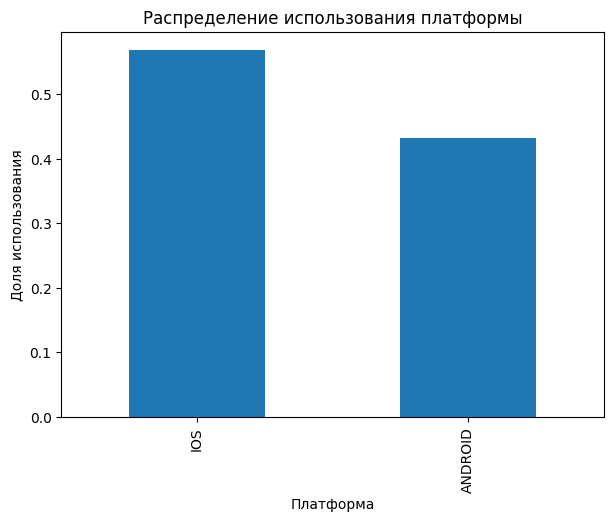

In [52]:
# Визуализация распределения использования платформы
fig, ax = plt.subplots(figsize=(7, 5))
platform_distribution.plot(kind='bar', ax=ax)
ax.set_title('Распределение использования платформы')
ax.set_xlabel('Платформа')
ax.set_ylabel('Доля использования')
plt.show()

In [53]:
# Расчет количества поездок на пользователя
trips_per_user = data.groupby('user_id').size()

# Среднее количество поездок на пользователя
average_trips_per_user = trips_per_user.mean()

average_trips_per_user


3.6441369013437463

In [54]:
## Расчет количества поездок на пользователя в месяц
trips_per_user_per_month = data.groupby(['user_id', 'month']).size().reset_index(name='trips_per_user_per_month')

# Среднее количество поездок на пользователя в месяц
average_trips_per_user_per_month = trips_per_user_per_month['trips_per_user_per_month'].mean()

average_trips_per_user_per_month

2.8717078468639694

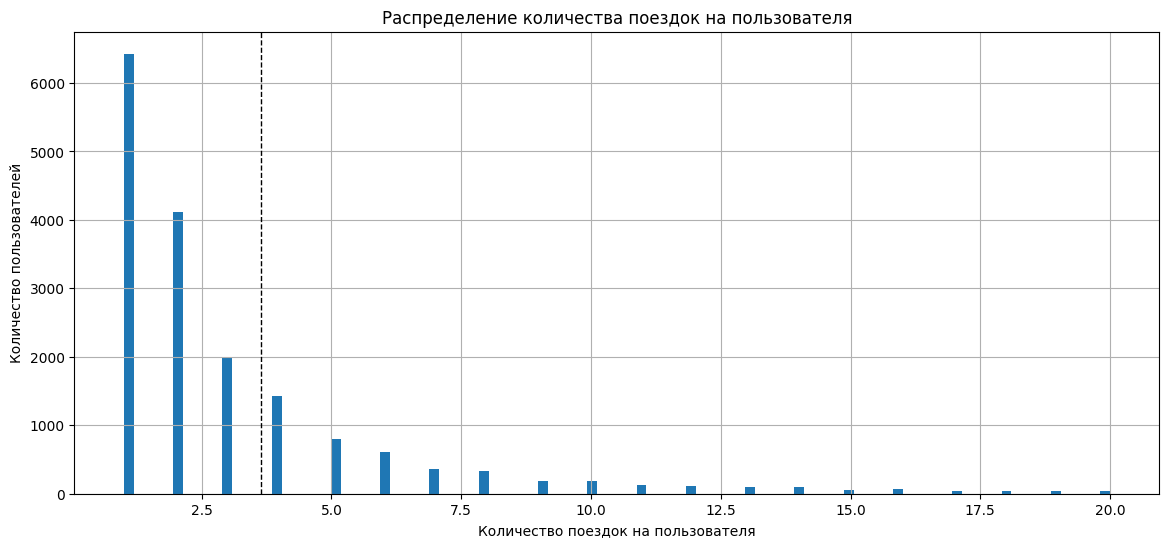

In [19]:
# Визуализация распределения количества поездок на пользователя
plt.figure(figsize=(14, 6))
trips_per_user.hist(bins=100, range=(1, 20))  # Ограничим диапазон для лучшей визуализации
plt.title('Распределение количества поездок на пользователя')
plt.xlabel('Количество поездок на пользователя')
plt.ylabel('Количество пользователей')
plt.axvline(average_trips_per_user, color='k', linestyle='dashed', linewidth=1)
plt.show()

Среднее количество поездок на пользователя составляет приблизительно 3.64. На гистограмме отображено распределение пользователей по количеству совершенных ими поездок, где пунктирная линия указывает на среднее значение.

In [ ]:
# Получаем дату первой поездки каждого пользователя и конвертируем ее в период (месяц)
first_trip_date = data.groupby('user_id')['started_at'].min().dt.to_period('M')

# Получаем количество поездок каждого пользователя по месяцам
monthly_trips = data.groupby(['user_id', data['started_at'].dt.to_period('M')]).size().unstack(fill_value=0)

# Фильтрация пользователей, которые совершили более одной поездки в месяц своей первой поездки
# и подсчет количества таких пользователей
returning_customers_count = monthly_trips.apply(lambda x: x.loc[x.index >= first_trip_date[x.name]].sum() > 1, axis=1).sum()

# Общее количество уникальных пользователей
total_unique_customers = data['user_id'].nunique()

# Расчет коэффициента удержания
retention_rate = returning_customers_count / total_unique_customers


In [26]:
# Вывод коэффициента удержания
retention_rate, returning_customers_count

(0.6309291374755943, 10987)

Коэффициент удержания клиентов (retention rate) составляет приблизительно 63.09%. Это означает, что из общего числа уникальных пользователей, которые использовали сервис, около 63.09% совершили более одной поездки после их первого месяца использования. В количественном выражении это 10,987 пользователей.

In [22]:
# Считаем количество новых пользователей каждый месяц
new_customers_monthly = first_trip_date.value_counts().sort_index()

# Считаем количество возвращающихся пользователей каждый месяц
# Определяем, совершил ли пользователь более одной поездки после месяца первой поездки
returning_customers_monthly = monthly_trips.apply(lambda x: x.loc[x.index > first_trip_date[x.name]].sum() > 1, axis=1)
returning_customers_monthly = returning_customers_monthly.groupby(first_trip_date).sum().sort_index()

# Расчет месячного коэффициента удержания
monthly_retention_rate = returning_customers_monthly / new_customers_monthly


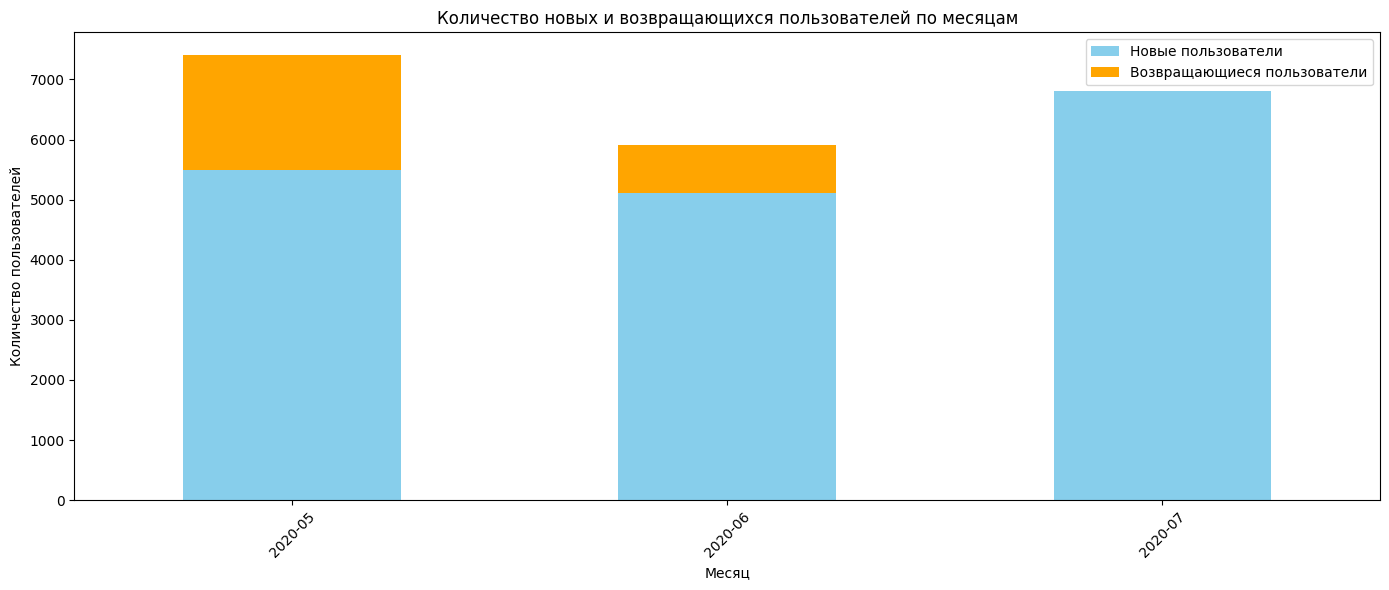

In [41]:
# Визуализация количества новых и возвращающихся пользователей по месяцам
plt.figure(figsize=(14, 6))
new_customers_monthly.plot(kind='bar', color='skyblue', label='Новые пользователи')
returning_customers_monthly.plot(kind='bar', color='orange', label='Возвращающиеся пользователи', bottom=new_customers_monthly)
plt.title('Количество новых и возвращающихся пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

На первом графике представлены количество новых и возвращающихся пользователей по месяцам. Мы видим, что количество новых пользователей колеблется от месяца к месяцу, и есть месяцы с высоким количеством возвращающихся пользователей.

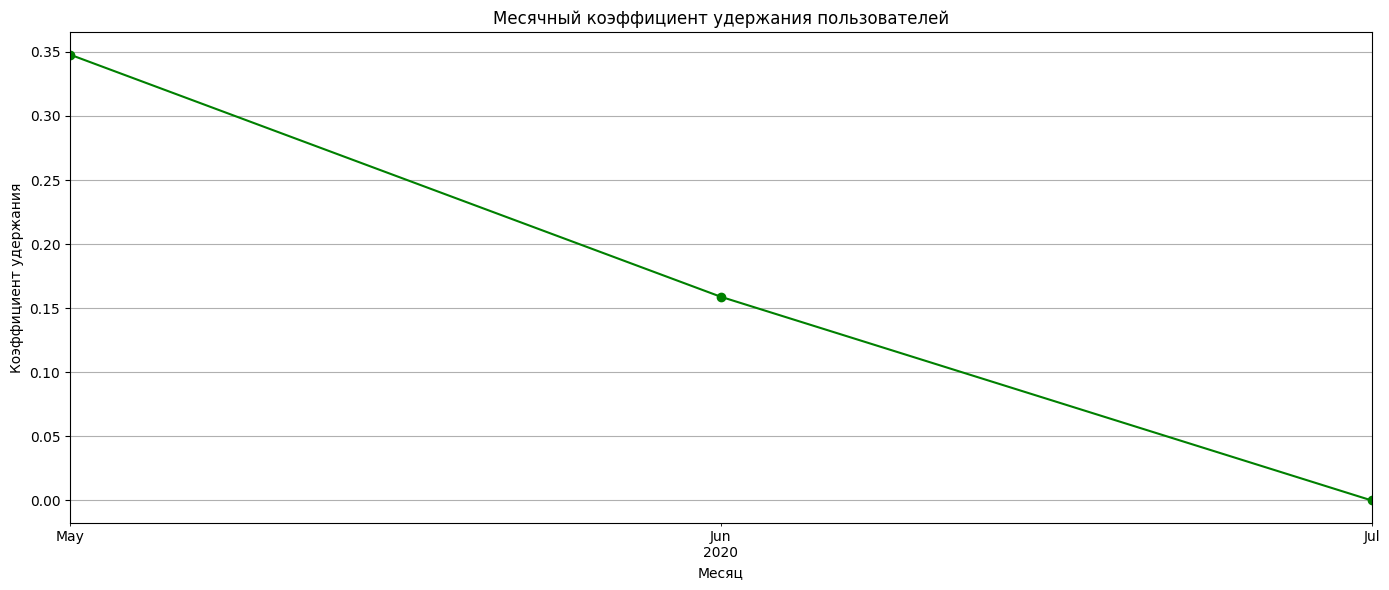

In [42]:
# Визуализация месячного коэффициента удержания
plt.figure(figsize=(14, 6))
monthly_retention_rate.plot(kind='line', marker='o', color='green')
plt.title('Месячный коэффициент удержания пользователей')
plt.xlabel('Месяц')
plt.ylabel('Коэффициент удержания')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


На втором графике показан месячный коэффициент удержания. Коэффициент удержания также меняется от месяца к месяцу, что может указывать на сезонность или на эффективность маркетинговых и удерживающих кампаний, проводимых в разное время года

Анализ метрик и визуализаций:

Пиковые часы выявлены; рекомендуется оптимизация расписания самокатов и их наличие в геозонах для этих периодов.

Вариативность по дням недели наблюдается; необходимо усилить подготовку на выходные.

Тренды по неделям и месяцам помогают в планировании долгосрочных стратегий и акций.

Коэффициент использования выявляет потенциал для улучшения загрузки самокатов. На данный момент коэффициент выглядит неравномерным и неоптимальным.

Средняя продолжительность поездок дает понимание о предпочтениях клиентов.

Отсутствие штрафов указывает на эффективность системы контроля.

Распределение по платформам указывает на направления для развития технологической поддержки.

Ответы на вопросы и рекомендации:

Улучшение коэффициента использования: Оптимизировать количество доступных самокатов в часы пик и выходные.

Повышение удержания клиентов: Ввести программы лояльности и стимулы для регулярных клиентов.

Дальнейшие шаги:

Оптимизация пиковых часов: Анализировать данные для улучшения доступности в периоды высокого спроса.

Маркетинговые инициативы: Разработать акции для стимулирования спроса в тихие часы и дни.

Программы лояльности: Предложить скидки и бонусы за частые поездки для улучшения удержания.
